## Import Important Lib ##

In [5]:
pip install TextBlob


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install wordcloud


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [8]:
trump=pd.read_csv(r"C:\Users\sanju\Downloads\Trumpall2.csv")
biden=pd.read_csv(r"C:\Users\sanju\Downloads\Bidenall2.csv")

### Pre-Processing the Data ###

In [9]:
biden.tail(5)

user                                               text
2535    meryn1977  @JoeBiden You'll just try to calm those waters...
2536  BSNelson114  @JoeBiden 96 days 96 dias #VoteJoeBiden2020  #...
2537     KenCapel  @JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...
2538   LeslyeHale  @JoeBiden Trump wants our children back at sch...
2539     rerickre  @JoeBiden ... and I know, because it’s much co...

In [10]:
biden["Cand"]="Biden"

In [11]:
biden.tail(5)

user                                               text   Cand
2535    meryn1977  @JoeBiden You'll just try to calm those waters...  Biden
2536  BSNelson114  @JoeBiden 96 days 96 dias #VoteJoeBiden2020  #...  Biden
2537     KenCapel  @JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...  Biden
2538   LeslyeHale  @JoeBiden Trump wants our children back at sch...  Biden
2539     rerickre  @JoeBiden ... and I know, because it’s much co...  Biden

In [12]:
trump.head(5)

user                                               text
0      manny_rosen   @sanofi please tell us how many shares the Cr...
1        osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...
2          Patsyrw   Your AG Barr is as useless &amp; corrupt as y...
3  seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...
4    James09254677   After 4 years you think you would have figure...

In [13]:
trump["Cand"]="Trump"

In [14]:
trump.head(5)

user                                               text   Cand
0      manny_rosen   @sanofi please tell us how many shares the Cr...  Trump
1        osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...  Trump
2          Patsyrw   Your AG Barr is as useless &amp; corrupt as y...  Trump
3  seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...  Trump
4    James09254677   After 4 years you think you would have figure...  Trump

In [15]:
from textblob import TextBlob

trump_txt=TextBlob(trump["text"][20])
print(trump["text"][100])
print("trump:", trump_txt.sentiment)


 Thank you President Trump for all you are doing to help the American people. First President in hi… https://t.co/MndKc1gtJB
trump: Sentiment(polarity=-0.2, subjectivity=0.9)


In [16]:
biden_txt=TextBlob(biden["text"][500])
print(biden["text"][500])
print("trump:", biden_txt.sentiment)

@JoeBiden ... and maybe some kind of healthcare that covers everybody... not that the thought of millions in hospit… https://t.co/v3QKITvlPJ
trump: Sentiment(polarity=0.6, subjectivity=0.9)


In [17]:
def pol(text):
    return TextBlob(text).sentiment.polarity

trump["Polarity"]=trump["text"].apply(pol)
trump.head() 

user                                               text   Cand  \
0      manny_rosen   @sanofi please tell us how many shares the Cr...  Trump   
1        osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...  Trump   
2          Patsyrw   Your AG Barr is as useless &amp; corrupt as y...  Trump   
3  seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...  Trump   
4    James09254677   After 4 years you think you would have figure...  Trump   

   Polarity  
0      0.05  
1      0.00  
2     -0.50  
3      0.50  
4      0.00

In [18]:
biden["Polarity"]=biden["text"].apply(pol)
biden.tail()

user                                               text   Cand  \
2535    meryn1977  @JoeBiden You'll just try to calm those waters...  Biden   
2536  BSNelson114  @JoeBiden 96 days 96 dias #VoteJoeBiden2020  #...  Biden   
2537     KenCapel  @JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...  Biden   
2538   LeslyeHale  @JoeBiden Trump wants our children back at sch...  Biden   
2539     rerickre  @JoeBiden ... and I know, because it’s much co...  Biden   

      Polarity  
2535      0.15  
2536      0.00  
2537      0.00  
2538      0.10  
2539      0.20

#### Determining Sentiments ####

In [19]:
trump["sentiment"]=np.where(trump["Polarity"]>0,"Positive","Negative")
trump["sentiment"][trump["Polarity"]==0]="Neutral"
trump.tail()

C:\Users\sanju\AppData\Local\Temp\ipykernel_21516\1048023970.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  trump["sentiment"][trump["Polarity"]==0]="Neutral"
C:\Users\sanju\AppData\Local\Temp\ipykernel_21516\1048023970.py:2: SettingWit

user                                               text  \
2783          4diva63  @realDonaldTrump For the 1/100 time, absentee ...   
2784         hidge826  @realDonaldTrump If you’re so scared of losing...   
2785     SpencerRossy  @realDonaldTrump I rarely get involved with fo...   
2786  ScoobyMcpherson  @realDonaldTrump This is the moment when Trump...   
2787          bjklinz     @realDonaldTrump I’m sorry, Donald. No. #POTUS   

       Cand  Polarity sentiment  
2783  Trump     0.000   Neutral  
2784  Trump     0.000   Neutral  
2785  Trump     0.225  Positive  
2786  Trump     0.000   Neutral  
2787  Trump    -0.500  Negative

In [20]:
biden["sentiment"]=np.where(biden["Polarity"]>0,"Positive","Negative")
biden["sentiment"][biden["Polarity"]==0]="Neutral"
biden.tail()

C:\Users\sanju\AppData\Local\Temp\ipykernel_21516\508246165.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  biden["sentiment"][biden["Polarity"]==0]="Neutral"
C:\Users\sanju\AppData\Local\Temp\ipykernel_21516\508246165.py:2: SettingWithC

user                                               text   Cand  \
2535    meryn1977  @JoeBiden You'll just try to calm those waters...  Biden   
2536  BSNelson114  @JoeBiden 96 days 96 dias #VoteJoeBiden2020  #...  Biden   
2537     KenCapel  @JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...  Biden   
2538   LeslyeHale  @JoeBiden Trump wants our children back at sch...  Biden   
2539     rerickre  @JoeBiden ... and I know, because it’s much co...  Biden   

      Polarity sentiment  
2535      0.15  Positive  
2536      0.00   Neutral  
2537      0.00   Neutral  
2538      0.10  Positive  
2539      0.20  Positive

In [21]:
trump_neutral=trump[trump["Polarity"]==0]
print(trump_neutral.shape)

biden_neutral=biden[biden["Polarity"]==0]
print(biden_neutral.shape)

(1464, 5)
(1509, 5)


In [22]:
print(trump.shape)
print(biden.shape)

(2788, 5)
(2540, 5)


In [23]:
Full_set=pd.concat([trump,biden])

In [24]:
Full_set

user                                               text  \
0         manny_rosen   @sanofi please tell us how many shares the Cr...   
1           osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...   
2             Patsyrw   Your AG Barr is as useless &amp; corrupt as y...   
3     seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...   
4       James09254677   After 4 years you think you would have figure...   
...               ...                                                ...   
2535        meryn1977  @JoeBiden You'll just try to calm those waters...   
2536      BSNelson114  @JoeBiden 96 days 96 dias #VoteJoeBiden2020  #...   
2537         KenCapel  @JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...   
2538       LeslyeHale  @JoeBiden Trump wants our children back at sch...   
2539         rerickre  @JoeBiden ... and I know, because it’s much co...   

       Cand  Polarity sentiment  
0     Trump      0.05  Positive  
1     Trump      0.00   Neutral  
2     Trump     -0.50  Negative  
3     Trump      0.50  Positive  
4     Trump      0.00   Neutral  
...     ...       ...       ...  
2535  Biden      0.15  Positive  
2536  Biden      0.00   Neutral  
2537  Biden      0.00   Neutral  
2538  Biden      0.10  Positive  
2539  Biden      0.20  Positive  

[5328 rows x 5 columns]

#### Vizualization ####

In [25]:
from matplotlib import rcParams

<Axes: >

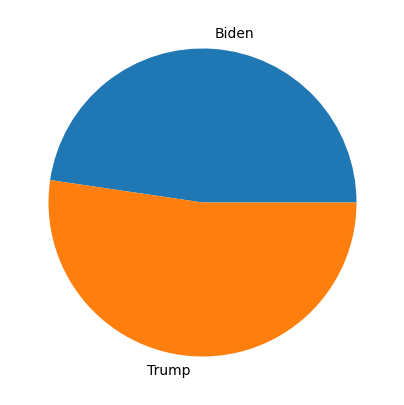

In [26]:
rcParams["figure.figsize"]= 5,5
Full_set.groupby("Cand").size().plot(kind='pie')

In [27]:
user_count=Full_set.groupby('user')['user'].value_counts()

In [28]:
user_count.tail(100)

user
vkosanke          1
vmpalmerton       1
voiceofacanuck    1
volcelation       1
vonPeiper         1
                 ..
zgirl_a           1
zoeileana         1
zubzubzub7        1
zzxyxy            1
zzzbor            2
Name: count, Length: 100, dtype: int64

In [29]:
count_trump=trump.groupby('sentiment').count()
print(count_trump)

           user  text  Cand  Polarity
sentiment                            
Negative    597   597   597       597
Neutral    1464  1464  1464      1464
Positive    727   727   727       727


In [30]:
count_biden=biden.groupby('sentiment').count()
print(count_biden)

           user  text  Cand  Polarity
sentiment                            
Negative    407   407   407       407
Neutral    1509  1509  1509      1509
Positive    624   624   624       624


In [31]:
tweet_words=''
for val in Full_set['text']:
    val = str(val)
    tokens= val.split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    tweet_words += " ".join(tokens)+" "

wordcloud = WordCloud(width= 800,height= 500, background_color='Black', min_font_size=10).generate(tweet_words)

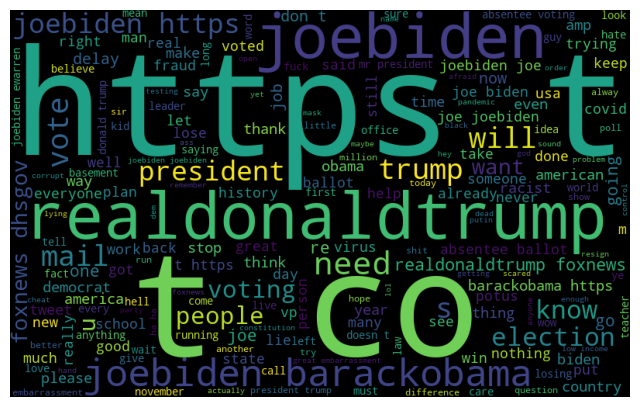

In [32]:
plt.figure(figsize= (8,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [33]:
import re
import string

In [34]:
def clean_text(text):
    text= str(text).lower()
    text= re.sub('\[.*?\]','', text)
    text = re.sub('https?://\S+','',text)
    text= re.sub('<.*?>+','', text)
    text= re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [35]:
Full_set["Clean_text"]=Full_set['text'].apply(lambda x:clean_text(x))
trump["Clean_text"]=trump['text'].apply(lambda x:clean_text(x))
biden["Clean_text"]=biden['text'].apply(lambda x:clean_text(x))

In [36]:
Full_set

user                                               text  \
0         manny_rosen   @sanofi please tell us how many shares the Cr...   
1           osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...   
2             Patsyrw   Your AG Barr is as useless &amp; corrupt as y...   
3     seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...   
4       James09254677   After 4 years you think you would have figure...   
...               ...                                                ...   
2535        meryn1977  @JoeBiden You'll just try to calm those waters...   
2536      BSNelson114  @JoeBiden 96 days 96 dias #VoteJoeBiden2020  #...   
2537         KenCapel  @JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...   
2538       LeslyeHale  @JoeBiden Trump wants our children back at sch...   
2539         rerickre  @JoeBiden ... and I know, because it’s much co...   

       Cand  Polarity sentiment  \
0     Trump      0.05  Positive   
1     Trump      0.00   Neutral   
2     Trump     -0.50  Negative   
3     Trump      0.50  Positive   
4     Trump      0.00   Neutral   
...     ...       ...       ...   
2535  Biden      0.15  Positive   
2536  Biden      0.00   Neutral   
2537  Biden      0.00   Neutral   
2538  Biden      0.10  Positive   
2539  Biden      0.20  Positive   

                                             Clean_text  
0      sanofi please tell us how many shares the cri...  
1                                     like comment rt    
2      your ag barr is as useless amp corrupt as you...  
3      mr trump wake up  most of the comments below ...  
4      after  years you think you would have figured...  
...                                                 ...  
2535  joebiden youll just try to calm those waters a...  
2536                 joebiden  days  dias   votjoebiden  
2537  joebiden you think you can do that you cant re...  
2538  joebiden trump wants our children back at scho...  
2539  joebiden  and i know because it’s much cooler ...  

[5328 rows x 6 columns]

In [37]:
trump


user                                               text  \
0         manny_rosen   @sanofi please tell us how many shares the Cr...   
1           osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...   
2             Patsyrw   Your AG Barr is as useless &amp; corrupt as y...   
3     seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...   
4       James09254677   After 4 years you think you would have figure...   
...               ...                                                ...   
2783          4diva63  @realDonaldTrump For the 1/100 time, absentee ...   
2784         hidge826  @realDonaldTrump If you’re so scared of losing...   
2785     SpencerRossy  @realDonaldTrump I rarely get involved with fo...   
2786  ScoobyMcpherson  @realDonaldTrump This is the moment when Trump...   
2787          bjklinz     @realDonaldTrump I’m sorry, Donald. No. #POTUS   

       Cand  Polarity sentiment  \
0     Trump     0.050  Positive   
1     Trump     0.000   Neutral   
2     Trump    -0.500  Negative   
3     Trump     0.500  Positive   
4     Trump     0.000   Neutral   
...     ...       ...       ...   
2783  Trump     0.000   Neutral   
2784  Trump     0.000   Neutral   
2785  Trump     0.225  Positive   
2786  Trump     0.000   Neutral   
2787  Trump    -0.500  Negative   

                                             Clean_text  
0      sanofi please tell us how many shares the cri...  
1                                     like comment rt    
2      your ag barr is as useless amp corrupt as you...  
3      mr trump wake up  most of the comments below ...  
4      after  years you think you would have figured...  
...                                                 ...  
2783  realdonaldtrump for the  time absentee ballots...  
2784  realdonaldtrump if you’re so scared of losing ...  
2785  realdonaldtrump i rarely get involved with for...  
2786  realdonaldtrump this is the moment when trump ...  
2787          realdonaldtrump i’m sorry donald no potus  

[2788 rows x 6 columns]

In [38]:
tweet_words=''
for val in Full_set['Clean_text']:
    val = str(val)
    tokens= val.split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    tweet_words += " ".join(tokens)+" "

wordcloud = WordCloud(width= 800,height= 500, background_color='Black', min_font_size=10).generate(tweet_words)

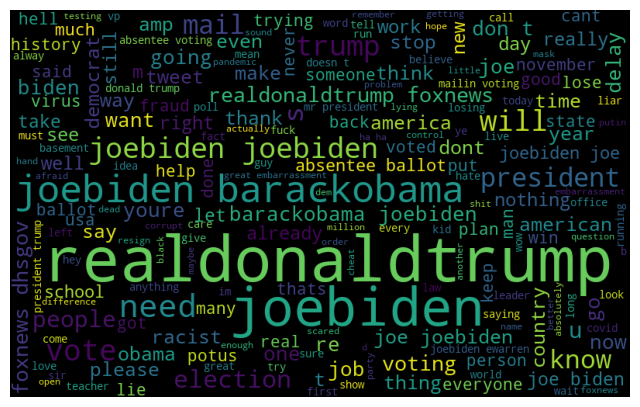

In [39]:
plt.figure(figsize= (8,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [40]:
tweet_words=''
for val in trump['Clean_text']:
    val = str(val)
    tokens= val.split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    tweet_words += " ".join(tokens)+" "

wordcloud1 = WordCloud(width= 800,height= 500, background_color='Black', min_font_size=10).generate(tweet_words)

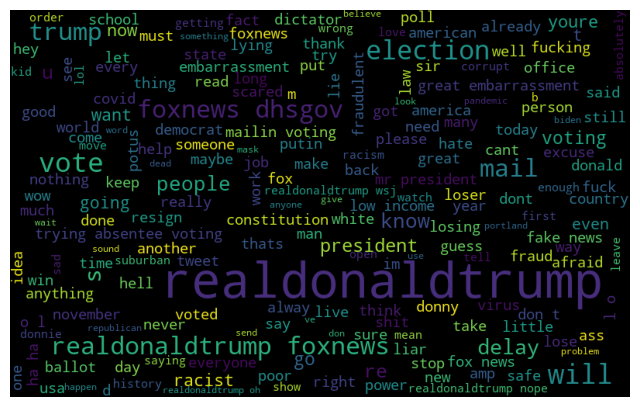

In [41]:
plt.figure(figsize= (8,8), facecolor= None)
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

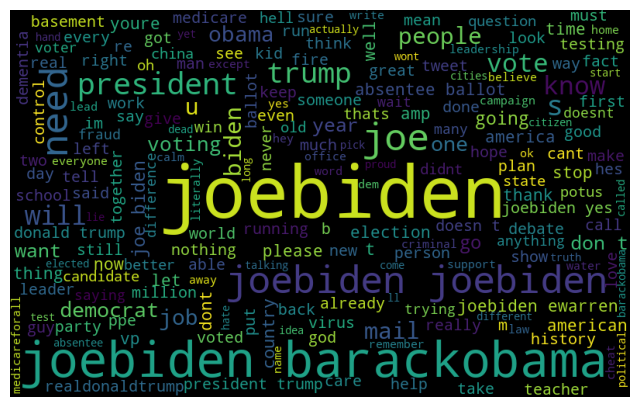

In [42]:
tweet_words=''
for val in biden['Clean_text']:
    val = str(val)
    tokens= val.split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    tweet_words += " ".join(tokens)+" "

wordcloud2 = WordCloud(width= 800,height= 500, background_color='Black', min_font_size=10).generate(tweet_words)

plt.figure(figsize= (8,8), facecolor= None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [43]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
from collections  import Counter
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [45]:
def remove_stopwords(x):
    return[w for w in x if not w in stop]

In [46]:
trump['token_text']=trump['Clean_text'].apply(lambda x:str(x).split())
trump['short_text']=trump['token_text'].apply(lambda x: remove_stopwords(x))
top=Counter([item for sublist in trump['short_text'] for item in sublist])
temp= pd.DataFrame(top.most_common(30))
temp.columns= ['Common words','count']
temp

Common words  count
0   realdonaldtrump   1944
1           foxnews    321
2            voting    155
3          election    154
4            dhsgov    150
5              vote    147
6              mail    138
7             trump    133
8            people    133
9         president    121
10            delay    103
11             like     99
12           you’re     91
13              get     86
14            going     84
15             know     80
16               go     80
17            youre     77
18           racist     76
19             want     71
20    embarrassment     67
21             news     66
22             dont     65
23             even     64
24               us     60
25            would     60
26              one     57
27            great     55
28             stop     54
29             it’s     54

In [47]:
biden['token_text']=biden['Clean_text'].apply(lambda x:str(x).split())
biden['short_text']=biden['token_text'].apply(lambda x: remove_stopwords(x))
top1=Counter([item for sublist in biden['short_text'] for item in sublist])
temp1= pd.DataFrame(top1.most_common(30))
temp1.columns= ['Common words','count']
temp1

Common words  count
0      joebiden   2591
1   barackobama    537
2           joe    334
3          need    270
4         trump    198
5     president    189
6         biden    148
7          know    106
8          vote    101
9          like     95
10       people     91
11         mail     90
12          get     87
13     absentee     78
14       voting     77
15          job     75
16           go     72
17        obama     72
18           us     69
19          one     67
20        would     65
21        don’t     63
22        years     61
23      country     57
24        going     57
25         want     53
26    democrats     52
27       please     52
28         dont     51
29         time     49

In [48]:
import plotly.express as px

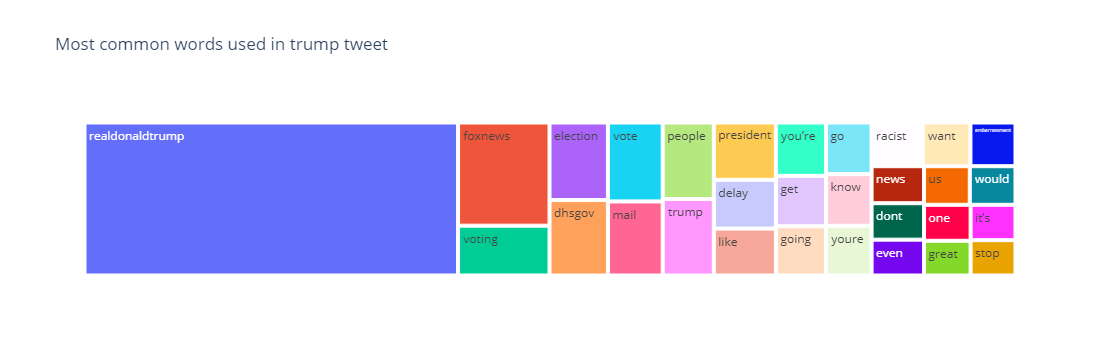

In [49]:
fig= px.treemap(temp, path=['Common words'], values='count', title='Most common words used in trump tweet ')
fig.show()

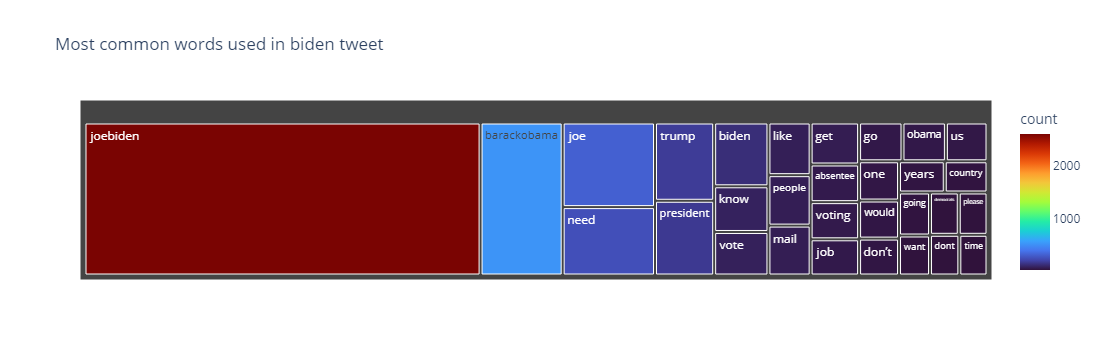

In [50]:
fig= px.treemap(temp1, path=['Common words'], values='count', title='Most common words used in biden tweet ',color='count', 
    color_continuous_scale='Turbo' )
fig.show()

In [63]:
from textblob import TextBlob
from textblob import Word
positive_words=[]
negative_words=[]
neutral_words=[]
for w in trump['Clean_text']:
    tokens=w.split()
    for Wr in tokens:
        stat=TextBlob(Wr)
        pol_stat=stat.polarity
        if(pol_stat>0.0):
            positive_words.append(Wr)
        if(pol_stat<0.0):
            negative_words.append(Wr)
        else:
            neutral_words.append(Wr)

In [71]:
print('No. of positive words in for Trump Tweets:',len(positive_words))
print('No. of negative words in for Trump Tweets:',len(negative_words))

No. of positive words in for Trump Tweets: 1117
No. of negative words in for Trump Tweets: 869


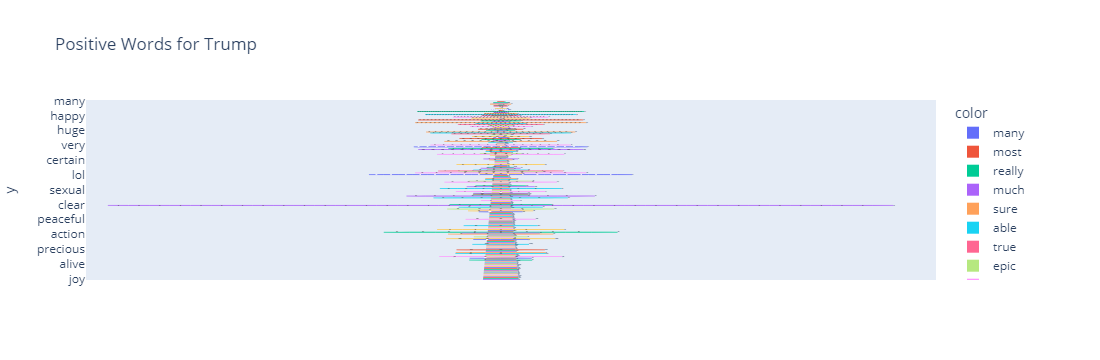

In [75]:
fig=px.funnel(positive_words, x=pd.Series(positive_words),y=pd.Series(positive_words),color=pd.Series(positive_words),orientation='h',title='Positive Words for Trump')
fig.show()

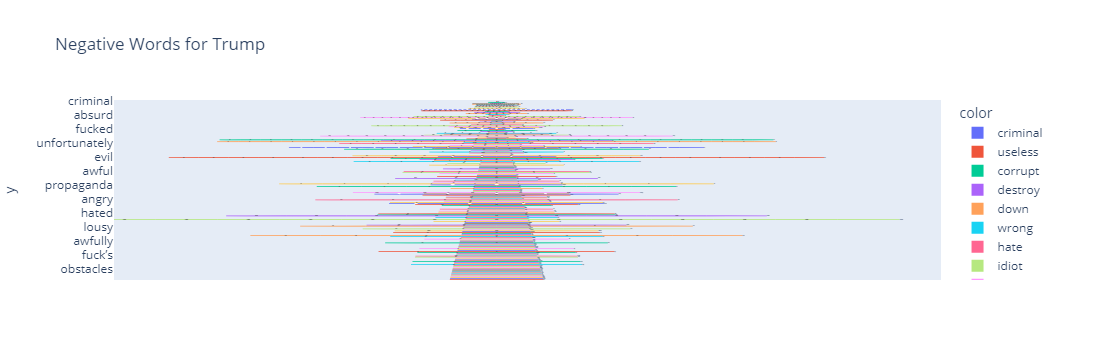

In [83]:
fig=px.funnel(negative_words, x=pd.Series(negative_words),y=pd.Series(negative_words),color=pd.Series(negative_words),orientation='h',title='Negative Words for Trump')
fig.show()

In [81]:
from textblob import TextBlob
from textblob import Word
positive_biden_words=[]
negative_biden_words=[]
neutral_biden_words=[]
for w in biden['Clean_text']:
    token=w.split()
    for Wr in token:
        stat=TextBlob(Wr)
        pol_stat=stat.polarity
        if(pol_stat>0.0):
            positive_biden_words.append(Wr)
        if(pol_stat<0.0):
            negative_biden_words.append(Wr)
        else:
            neutral_biden_words.append(Wr)

print('No. of positive words in for biden Tweets:',len(positive_biden_words))
print('No. of negative words in for biden Tweets:',len(negative_biden_words))

No. of positive words in for biden Tweets: 991
No. of negative words in for biden Tweets: 624


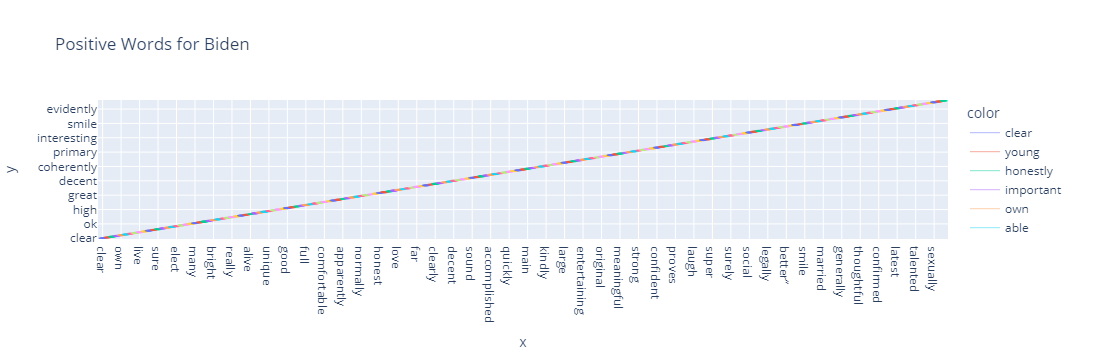

In [85]:
fig=px.density_contour(positive_biden_words,x=pd.Series(positive_biden_words),y=pd.Series(positive_biden_words),color=pd.Series(positive_biden_words),title='Positive Words for Biden')
fig.show()

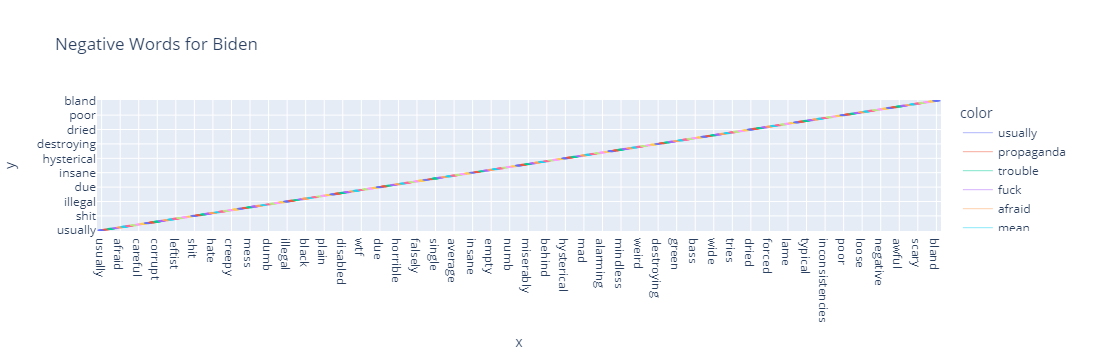

In [87]:
fig=px.density_contour(negative_biden_words,x=pd.Series(negative_biden_words),y=pd.Series(negative_biden_words),color=pd.Series(negative_biden_words),title='Negative Words for Biden')
fig.show()

In [89]:
trump.head(10)

user                                               text   Cand  \
0      manny_rosen   @sanofi please tell us how many shares the Cr...  Trump   
1        osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...  Trump   
2          Patsyrw   Your AG Barr is as useless &amp; corrupt as y...  Trump   
3  seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...  Trump   
4    James09254677   After 4 years you think you would have figure...  Trump   
5   IndependentsDo    You lie to lie to cover up a lie to cover up...  Trump   
6  curtiswhitworth     Really? My prices have gone up. That’s a fact.  Trump   
7      shayked5777   Don, you are delusion.  Someone needs to invo...  Trump   
8  CantStandya2018   How much on stocks have you made pushing mira...  Trump   
9    Chris09704800                            https://t.co/MsPqMjxUpk  Trump   

   Polarity sentiment                                         Clean_text  \
0      0.05  Positive   sanofi please tell us how many shares the cri...   
1      0.00   Neutral                                  like comment rt     
2     -0.50  Negative   your ag barr is as useless amp corrupt as you...   
3      0.50  Positive   mr trump wake up  most of the comments below ...   
4      0.00   Neutral   after  years you think you would have figured...   
5      0.00   Neutral    you lie to lie to cover up a lie to cover up...   
6      0.20  Positive        really my prices have gone up that’s a fact   
7      0.00   Neutral   don you are delusion  someone needs to invoke...   
8      0.35  Positive   how much on stocks have you made pushing mira...   
9      0.00   Neutral                                                      

                                          token_text  \
0  [sanofi, please, tell, us, how, many, shares, ...   
1                                [like, comment, rt]   
2  [your, ag, barr, is, as, useless, amp, corrupt...   
3  [mr, trump, wake, up, most, of, the, comments,...   
4  [after, years, you, think, you, would, have, f...   
5  [you, lie, to, lie, to, cover, up, a, lie, to,...   
6  [really, my, prices, have, gone, up, that’s, a...   
7  [don, you, are, delusion, someone, needs, to, ...   
8  [how, much, on, stocks, have, you, made, pushi...   
9                                                 []   

                                          short_text  
0  [sanofi, please, tell, us, many, shares, crimi...  
1                                [like, comment, rt]  
2  [ag, barr, useless, amp, corrupt, rep, pramila...  
3  [mr, trump, wake, comments, tweets, nothing, c...  
4  [years, think, would, figured, horrendous, spr...  
5           [lie, lie, cover, lie, cover, lie, lied]  
6               [really, prices, gone, that’s, fact]  
7  [delusion, someone, needs, invoke, baker, act,...  
8  [much, stocks, made, pushing, miracle, covid, ...  
9                                                 []

#### Sentiment Analysis ####

In [93]:
trump['sentiment'].value_counts()

sentiment
Neutral     1464
Positive     727
Negative     597
Name: count, dtype: int64

In [95]:
biden['sentiment'].value_counts()

sentiment
Neutral     1509
Positive     624
Negative     407
Name: count, dtype: int64

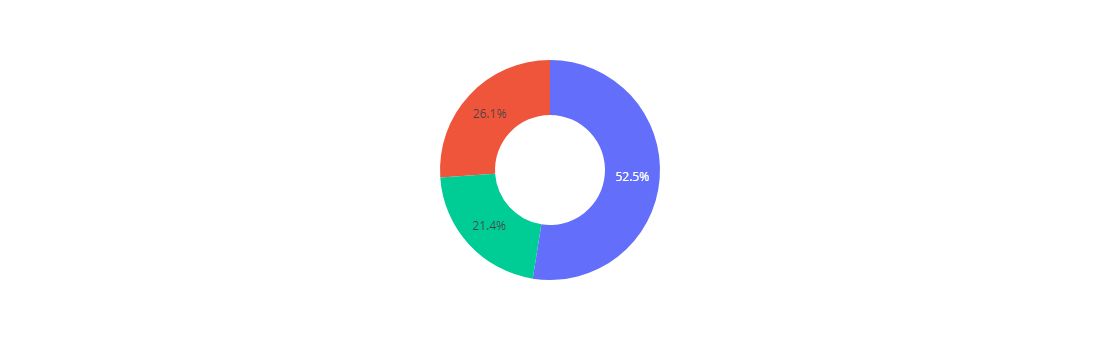

In [101]:
fig=px.pie(values=trump['sentiment'].value_counts(),hover_name=['neutral','positive','negative'],labels={0:'neutral',1:'positive',2:'negative'},hole=0.5,color=['neutral','positive','negative'])
fig.show()

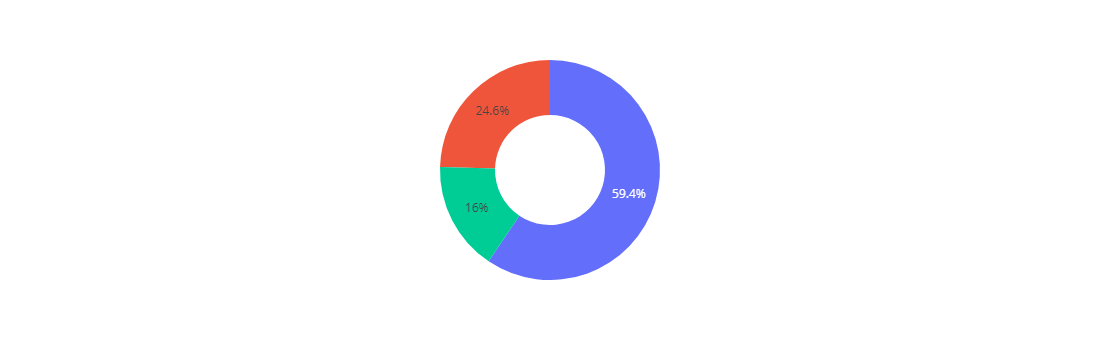

In [103]:
fig=px.pie(values=biden['sentiment'].value_counts(),hover_name=['neutral','positive','negative'],labels={0:'neutral',1:'positive',2:'negative'},hole=0.5,color=['neutral','positive','negative'])
fig.show()

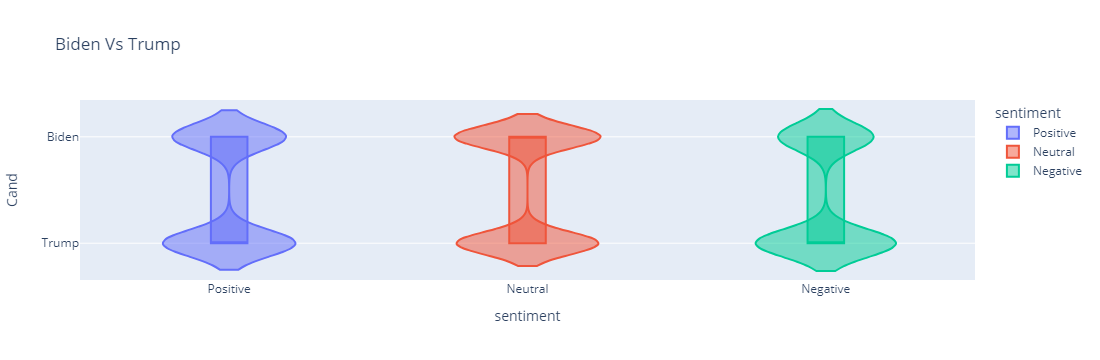

In [115]:
fig=px.violin(Full_set,x='sentiment',y='Cand',color='sentiment',hover_name='sentiment',violinmode='overlay',box=True,orientation='v',title='Biden Vs Trump')
fig.show()

#### Result: As we can see in above graph the negative bar is more spread out for Trump hence Trump can be considered less Popular than Biden